### _Jupyter Notebooks_

Jupyter Notebooks, formerly iPython, is typically referred to as Jupyter.  With the beta release of Jupyter Labs, an IDE version, I will refer to just the notebook as JN to avoid confusion for future readers.  

JN is a combination of Markdown with executable code in cells.  This example will repeat much of what was achieved above using AMLS. The text below is HTML, but the complete JN can be cloned from my GitHub repo.

For a good description of JN on Azure, Scott Hanselman has a nice YouTube video on JN many features - https://www.youtube.com/watch?v=JWEhns28Cr4

#### Azure Storage SDK
Surprisingly, the Azure Storage SDK was not pre-installed in Azure hosted JN.  Use pip or Annaconda (package managers) to install the azure storage sdk.  Once installed, this shell/bash command can be eliminated for futre runs in this project.

In [ ]:
!pip install azure-storage

#### Import Data
Azure Table data is imported using the Azure Storage /Table Storage SDK and the data is shaped using Pandas to match the AMLS dataset.  I would typically import my credentials which are needed for Azure access, but for this public notebook, I use a Shared Access Signature token to access the data in read/query only format.  The token has an expiration date which can be refresehed on request.  Alternatively, I have a small sample dataset, in my DuckpinA repo on GitHub. See below in _Data Alternatives_ on how to access web based data.
* Imports and constants

In [1]:
# import credentials
from azure.storage.table import TableService
import numpy as np
import pandas as pd

container_name = 'duckpinjson'
account_name = container_name
# account_key = credentials.STORAGE_ACCOUNT_KEY
table_sas_token = 'sp=r&sv=2017-04-17&tn=pindata&sig=0vcZimSsLnyez5Kw5tOt6JASJ4MrVCnz13cOySaxtJQ%3D&se=2019-01-29T11%3A54%3A17Z'
table_name = 'pindata'

* Get Table Data and convert to Pandas Dataframe 

In [2]:
# Two fancy Python functions to iterate Azure Tables and persist the result in a Pandas dataframe  
def get_dataframe_from_table_storage_table(table_service, filter_query):
    """ Create a dataframe from table storage data """
    return pd.DataFrame(get_data_from_table_storage_table(table_service,
                                                          filter_query))
def get_data_from_table_storage_table(table_service, filter_query):
    """ Retrieve data from Table Storage """
    for record in table_service.query_entities(
        table_name, filter=filter_query
    ):
        yield record
        
# table_service = TableService(
#     account_name=account_name, account_key=account_key)
table_service = TableService(
    account_name=account_name, sas_token=table_sas_token)
fq = "PartitionKey eq 'Lane 4'"
df = get_dataframe_from_table_storage_table(table_service=table_service,filter_query=fq)
df.head(5) #Show first five records in the dataframe

,PartitionKey,RowKey,Timestamp,beginingPinCount,endingPinCount,etag,res,x0,x1,x2,x3,x4,x5,y0,y1,y2,y3,y4,y5
0,Lane 4,20181019044781,2018-10-19 23:23:18.239444+00:00,1023,876,"W/""datetime'2018-10-19T23%3A23%3A18.2394448Z'""",NaN,763,760,754,754,755,NaN,388,319,229,158,97,NaN
1,Lane 4,20181019047495,2018-10-19 23:01:57.236804+00:00,1023,947,"W/""datetime'2018-10-19T23%3A01%3A57.2368045Z'""",NaN,225,244,259,274,290,NaN,397,363,305,245,186,NaN
2,Lane 4,20181019054037,2018-10-19 23:01:48.233574+00:00,1023,930,"W/""datetime'2018-10-19T23%3A01%3A48.2335741Z'""",NaN,1006,974,948,NaN,NaN,NaN,314,173,61,NaN,NaN,NaN
3,Lane 4,20181019059314,2018-10-19 22:59:22.238739+00:00,1023,1007,"W/""datetime'2018-10-19T22%3A59%3A22.2387392Z'""",NaN,870,861,853,849,840,NaN,384,271,166,80,15,NaN
4,Lane 4,20181019075651,2018-10-19 23:00:39.253765+00:00,1023,661,"W/""datetime'2018-10-19T23%3A00%3A39.2537652Z'""",NaN,358,373,383,392,400,NaN,421,389,349,289,232,NaN


In [3]:
df.tail(5) #Show last five records in the dataframe

,PartitionKey,RowKey,Timestamp,beginingPinCount,endingPinCount,etag,res,x0,x1,x2,x3,x4,x5,y0,y1,y2,y3,y4,y5
3652,Lane 4,20181221856778,2018-12-22 03:48:29.726076+00:00,1023,643,"W/""datetime'2018-12-22T03%3A48%3A29.7260768Z'""",1440,399,413,425,436,446,456,392,337,256,185,122,68
3653,Lane 4,20181221916380,2018-12-22 03:49:08.792957+00:00,1023,678,"W/""datetime'2018-12-22T03%3A49%3A08.7929576Z'""",1440,199,240,275,306,335,360,398,330,243,167,101,41
3654,Lane 4,20181221964908,2018-12-22 03:46:42.825063+00:00,1023,1022,"W/""datetime'2018-12-22T03%3A46%3A42.8250631Z'""",1440,1136,1102,1075,1049,1030,1016,395,325,231,154,88,31
3655,Lane 4,20181221980028,2018-12-22 03:51:20.847274+00:00,1023,959,"W/""datetime'2018-12-22T03%3A51%3A20.8472743Z'""",1440,128,167,199,228,253,278,391,333,264,202,143,91
3656,Lane 4,20181221996955,2018-12-22 03:51:04.859007+00:00,1023,951,"W/""datetime'2018-12-22T03%3A51%3A04.8590072Z'""",1440,216,250,271,291,307,325,415,370,297,225,159,104


* Compute the number of pins standing for each decimal value of the endingPinCount

In [4]:
#Function to count the number of 1s in the binary equivalent of a decimal value
# Result returned in a dictionary for all pin configurations
def numUp():
    pcs = {}
    for pinCount in range(0, 1023):
        bits = bin(pinCount)
        count = 0
        # print(bits, str(bits))
        for bit in str(bits[2:len(str(bits))]):
            if bit == '1':
                count = count + 1
            # print(bit, count)
        pcs[pinCount] = count
    return pcs
# Add up column to dataframe
df['up']= df['endingPinCount'].map(numUp())
df.head(5)

,PartitionKey,RowKey,Timestamp,beginingPinCount,endingPinCount,etag,res,x0,x1,x2,x3,x4,x5,y0,y1,y2,y3,y4,y5,up
0,Lane 4,20181019044781,2018-10-19 23:23:18.239444+00:00,1023,876,"W/""datetime'2018-10-19T23%3A23%3A18.2394448Z'""",NaN,763,760,754,754,755,NaN,388,319,229,158,97,NaN,6
1,Lane 4,20181019047495,2018-10-19 23:01:57.236804+00:00,1023,947,"W/""datetime'2018-10-19T23%3A01%3A57.2368045Z'""",NaN,225,244,259,274,290,NaN,397,363,305,245,186,NaN,7
2,Lane 4,20181019054037,2018-10-19 23:01:48.233574+00:00,1023,930,"W/""datetime'2018-10-19T23%3A01%3A48.2335741Z'""",NaN,1006,974,948,NaN,NaN,NaN,314,173,61,NaN,NaN,NaN,5
3,Lane 4,20181019059314,2018-10-19 22:59:22.238739+00:00,1023,1007,"W/""datetime'2018-10-19T22%3A59%3A22.2387392Z'""",NaN,870,861,853,849,840,NaN,384,271,166,80,15,NaN,9
4,Lane 4,20181019075651,2018-10-19 23:00:39.253765+00:00,1023,661,"W/""datetime'2018-10-19T23%3A00%3A39.2537652Z'""",NaN,358,373,383,392,400,NaN,421,389,349,289,232,NaN,5


* Shape with Pandas and exclude unwanted columns.

Use Pandas to generate the dataset created in AMLS with SQLite.  The sql was:
```sql
select endingPinCount as epc,
        up,y1, 
        SQRT(SQUARE(x1-x0)+SQUARE(y1-y0)) as v1,
        SQRT(SQUARE(x2-x1)+SQUARE(y2-y1)) as v2,
        ATAN(CAST((x2-x1) as float)/CAST((y2-y1) as float)) as theta,
        CAST(x1 as float) as x
from t1
WHERE y2 IS NOT NULL;
```

If you are following closely, you will see that I combined AMLS sequences to get theta and x to absolute values abst and absx, respectively.

In [5]:
df1 = df
df1['v1'] = np.sqrt((df['x1'].astype(float)-df['x0'].astype(float))**2 + (df['y1'].astype(float)-df['y0'].astype(float))**2)
df1['v2'] = np.sqrt((df['x2'].astype(float)-df['x1'].astype(float))**2 + (df['y2'].astype(float)-df['y1'].astype(float))**2)
df1['abst'] = np.arctan((df['x2'].astype(float)-df['x1'].astype(float))/ (df['y2'].astype(float)-df['y1'].astype(float))).abs()
df1 = df1[df1["y1"].notnull()]
df1['absx'] = (df1['x1'].astype(float)-562).abs()
df1= df1.drop(['PartitionKey','RowKey','Timestamp','beginingPinCount','etag', 'res',
               'x0','y0','x1','y1','x2','y2','x3','y3','x4','y4','x5','y5'], axis=1)
df1.head(5)

,endingPinCount,up,v1,v2,abst,absx
0,876,6,69.065187,90.199778,0.066568,198.0
1,947,7,38.948684,59.908263,0.253076,318.0
2,930,5,144.585615,114.978259,0.228103,412.0
3,1007,9,113.357840,105.304321,0.076044,299.0
4,661,5,35.341194,41.231056,0.244979,189.0


Similar to AMLS, I plot the data but this time will use theta to see if ball angle and presumably spin affect pin results.  A shell/bash command is needed to redirect the plot output to JN.

In [6]:
%matplotlib inline

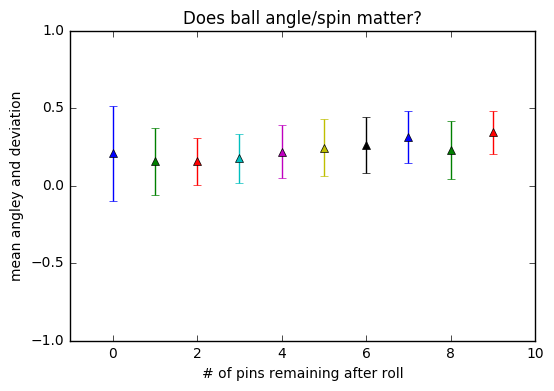

In [7]:
import matplotlib.pyplot as plt

fig =plt.figure() 
ax = fig.gca()
ax.cla()
ax.set_xlim(-1, 10)
ax.set_ylim(-1,1)
ax.set_title('Does ball angle/spin matter?')
plt.ylabel('mean angley and deviation')
plt.xlabel('# of pins remaining after roll')
for x in range(0,10):
    #pandas syntax to group data by the number of up pins.
    endcountGroup = df1.loc[df1['up'] == x]
    #pandas describe()generates a table of stats for the dataframe
    g = endcountGroup.describe()
    ax.errorbar(x, g.iloc[1][4], g.iloc[2][4], marker='^')
# fig.savefig ("duckpin.png")



In [8]:
!curl https://raw.githubusercontent.com/cliffeby/DuckpinA/master/pindatacsv.csv -o pincsv.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  323k  100  323k    0     0  1403k      0 --:--:-- --:--:-- --:--:-- 1411k


Use numpy or pandas to read the file.  In this case, I used numpy and sorted the records prior to creating the dataframe 

In [9]:
csv = np.recfromcsv('pincsv.csv')
csv = np.sort(csv)
df3 = pd.DataFrame(csv)
df3.head(5)

,partitionkey,rowkey,timestamp,beginingpincount,endingpincount,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,up
0,b'Lane 4',20181019044781,b'10/19/2018 11:23:18 PM',1023,876,763,388,b'760',b'319',b'754',b'229',b'754',b'158',b'755',b'97',6
1,b'Lane 4',20181019047495,b'10/19/2018 11:01:57 PM',1023,947,225,397,b'244',b'363',b'259',b'305',b'274',b'245',b'290',b'186',7
2,b'Lane 4',20181019054037,b'10/19/2018 11:01:48 PM',1023,930,1006,314,b'974',b'173',b'948',b'61',"b'""""'","b'""""'","b'""""'","b'""""'",5
3,b'Lane 4',20181019059314,b'10/19/2018 10:59:22 PM',1023,1007,870,384,b'861',b'271',b'853',b'166',b'849',b'80',b'840',b'15',9
4,b'Lane 4',20181019075651,b'10/19/2018 11:00:39 PM',1023,661,358,421,b'373',b'389',b'383',b'349',b'392',b'289',b'400',b'232',5


### Creating the SAS token
The following shows how to create  a _Shared Access Signature_ to access the Azure table data in read/query only format.  Since the my credentials are needed to create the token, I have moved the code to a Markdown cell. To create the sas_token:
```python
from azure.storage.table.models import TablePermissions
from datetime import datetime, timedelta

table_service = TableService(
    account_name=account_name, account_key = account_key)
table_sas_token = table_service.generate_table_shared_access_signature(
    table_name, 
    TablePermissions.QUERY, 
    datetime.utcnow() + timedelta(hours=800))

table_sas_token
```